In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import psycopg2

table_name = "test"
#Haciendo la conexión a la BD
conn = psycopg2.connect(database="personality_test",
                        host="138.197.196.136",
                        user="persontest",
                        password="f57403cdcca683e5b",
                        port="5432")

cursor = conn.cursor()
#Seleccionando todos los datos de la BD
select_query = f"SELECT * FROM {table_name}"
cursor.execute(select_query)
registros = cursor.fetchall()
#Creando el template del dataframe
testPersonalidad = pd.DataFrame(columns=["Identificador", "Nombre","Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                                        "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
                                                        "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Simpatía", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
                                                        "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ])
#Vaciando los datos de la BD al dataframe 
indice=0
for registro in registros:
    testPersonalidad.loc[indice] = registro
    indice += 1      

#Creando la lista de promedio de cada columna
listaPromedio=[]
totalColumnas=len(testPersonalidad.columns)
e=0
while e <= totalColumnas:    
    if e >= 2 and e < 37:
     promedio= (sum(testPersonalidad.iloc[:, e])/(testPersonalidad.index[-1]+1))
     listaPromedio.append(promedio)
    e+=1
    
#Creando el dataframe de promedio
dfPromedio = pd.DataFrame([listaPromedio], columns=["Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                                        "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
                                                        "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Simpatía", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
                                                        "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ]) 
print(dfPromedio)


cursor.close()
conn.close()

   Neurosis   Ansiedad   Ira  Depresión  Vergüenza  Falta de moderacion   
0     62.75  11.333333  10.0  10.916667  10.916667             9.416667  \

   Vulnerabilidad  Extroversión  Cordialidad  Sociabilidad  ...  Cooperación   
0       10.166667          73.5    12.166667     10.666667  ...         15.0  \

   Modestia  Empatía  Meticulosidad  Autoeficacia  Orden  Sentido del deber   
0  9.083333     14.0          90.75     15.916667   14.5          15.666667  \

   Orientación a objetivos  Disciplina  Prudencia  
0                15.833333       12.75  16.083333  

[1 rows x 35 columns]


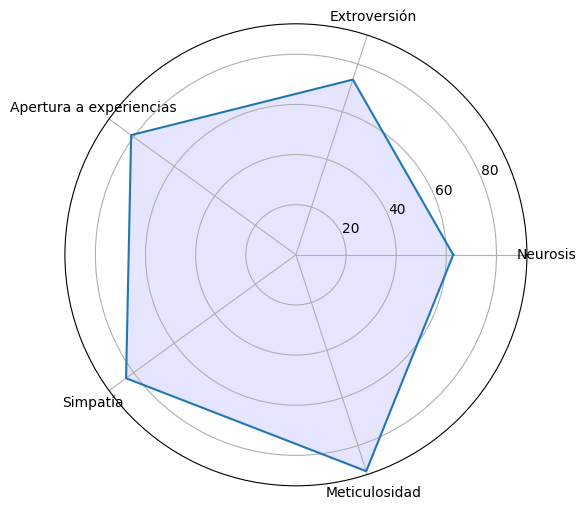

In [18]:
import numpy as np
import seaborn as sns

datos5 = dfPromedio.loc[:, ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]]

etiquetas=['Neurosis', 'Extroversión', 'Apertura a experiencias', 'Simpatía', 'Meticulosidad']

lista = list(datos5.iloc[0])
lista=np.concatenate((lista, [lista[0]]))

plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)

#plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=1)

plt.show() 

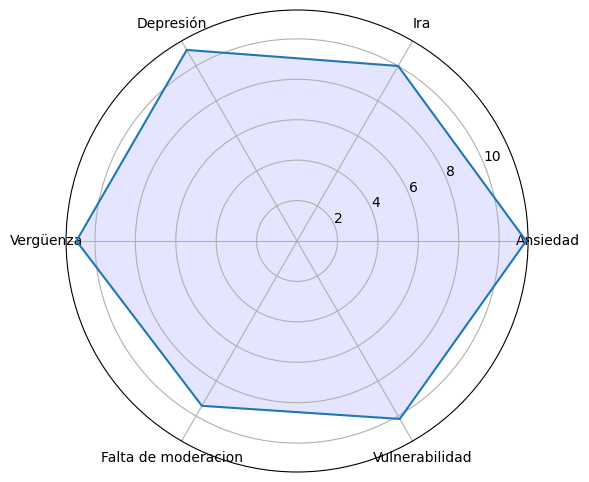

In [19]:
neurosis = dfPromedio.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                      "Falta de moderacion", "Vulnerabilidad"]]
etiquetas=["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad"]

lista = list(neurosis.iloc[0])
lista=np.concatenate((lista, [lista[0]]))


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)



In [ ]:
extroversion = dfPromedio.loc[:, ["Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría"]]
etiquetas=["Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
            "Búsqueda de nuevas experiencias", "Alegría"]

lista = list(extroversion.iloc[0])
lista=np.concatenate((lista, [lista[0]]))


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)